# Calculate the SOI from Darwin and Tahiti MSLP, using the Troup method, and the 1981 - 2010 climatology 

### calculates the SOI 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import sys

In [4]:
import pandas as pd
import numpy as np
from dateutil import parser as dparser
from datetime import datetime, timedelta

In [5]:
from paleopy import indices

In [6]:
opath = '/media/nicolasf/END19101/data/PICT/datasets/Indices/SOI_monthly_1948_2021_1981_2010_Clim.csv'
clim_start = 1981
clim_end = 2010

### get TAHITI MSLP

In [12]:
tahitidf = indices.get_BOM_MSLP(station='tahiti')

In [13]:
tahitidf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1011.1,1010.7,1011.1,1012.3,1012.8,1013.7,1014.3,1015.3,1014.8,1013.4,1011.2,1010.8
2020,1011.9,1011.5,1012.1,1012.8,1014.4,1012.9,1014.3,1015.7,1015.7,1013.6,1013.3,1013.3
2021,1013.5,1012.0,1012.0,1012.3,1013.4,1014.6,1015.7,1015.7,1015.9,1013.7,1013.1,1012.7
2022,1011.8,1013.2,1014.0,1013.6,1014.3,1015.5,1015.4,1015.3,1016.7,1015.1,1012.2,1013.0
2023,1012.9,1012.1,1012.0,1011.5,1012.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### get DARWIN MSLP

In [14]:
darwindf = indices.get_BOM_MSLP(station='darwin')

In [15]:
darwindf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1006.8,1009.0,1008.4,1010.1,1012.3,1013.8,1014.2,1014.3,1014.5,1011.4,1009.7,1008.4
2020,1007.2,1007.4,1009.1,1010.5,1012.4,1012.9,1012.7,1012.5,1011.6,1010.0,1009.0,1006.5
2021,1005.6,1005.0,1008.1,1009.7,1011.3,1013.1,1012.3,1013.3,1012.0,1009.7,1008.3,1006.5
2022,1006.5,1006.9,1007.5,1008.5,1010.4,1011.7,1013.1,1012.2,1011.3,1009.3,1008.6,1005.6
2023,1006.0,1005.3,1008.4,1009.1,1013.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
"""
climatological period
"""
clim_start = clim_start
clim_end = clim_end
clim = "{}_{}".format(clim_start, clim_end)

### calculates the SOI according to the Troup (1965) method

If T and D are the monthly pressures at Tahiti and Darwin, respectively, and Tc and Dc the climatological monthly pressures, then: 
```
SOI    =   [ (T – Tc) – (D – Dc) ]  /  [ StDev (T – D)  ]
```

The reference is: 

**Troup, A.J,, 1965: The Southern Oscillation. Quarterly Journal of Royal Meteorological
Society 91, 490-506.**

In [17]:
### ==============================================================================================================
tahiti_cli = tahitidf.loc[clim_start:clim_end,:]
darwin_cli = darwindf.loc[clim_start:clim_end,:]

tahiti_mean = tahiti_cli.mean(0)
darwin_mean = darwin_cli.mean(0)
### ==============================================================================================================

### ==============================================================================================================
### Step 3: calculate the SOI
soi = ((tahitidf - tahiti_mean) - (darwindf - darwin_mean)) / ((tahiti_cli -  darwin_cli).std(0))

In [18]:
soi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1876,1.022749,0.989125,0.377561,0.927624,0.963654,2.121875,-0.481909,1.461516,0.961180,-0.591596,-0.259023,-0.246954
1877,-0.799152,-0.369698,-0.059956,-0.454796,0.655285,-1.314581,-0.959272,-0.498059,-1.624450,-1.321730,-1.135417,-1.143538
1878,-0.716338,-1.508170,-1.032216,-0.394691,0.501100,0.076366,1.768516,1.522753,1.635692,1.149493,1.318485,1.687780
1879,1.146969,1.246199,1.544273,1.168045,0.501100,2.040055,2.382268,2.441304,1.748110,1.542643,0.851076,-0.482897
1880,0.981342,0.732050,1.641499,0.627098,1.503301,1.303671,0.268232,1.645226,0.736342,0.587852,0.617371,-0.152577


In [19]:
### stack everything vertically and add a proper datetime index
ts_soi = pd.DataFrame(soi.stack())

dates = []
for i in range(len(ts_soi)):
    dates.append(dparser.parse("{}-{}-1".format(ts_soi.index.get_level_values(0)[i], ts_soi.index.get_level_values(1)[i])))

ts_soi.index = dates
ts_soi.columns = ['soi']

In [20]:
ts_soi.tail()

,soi
2023-01-01,1.064156
2023-02-01,0.952400
2023-03-01,0.183109
2023-04-01,0.266467
2023-05-01,-1.503301


In [21]:
ts_soi.head()

,soi
1876-01-01,1.022749
1876-02-01,0.989125
1876-03-01,0.377561
1876-04-01,0.927624
1876-05-01,0.963654


In [22]:
ts_soi.tail()

,soi
2023-01-01,1.064156
2023-02-01,0.952400
2023-03-01,0.183109
2023-04-01,0.266467
2023-05-01,-1.503301


In [23]:
ts_soi = ts_soi.loc['1948':'2021',:]

<AxesSubplot:>

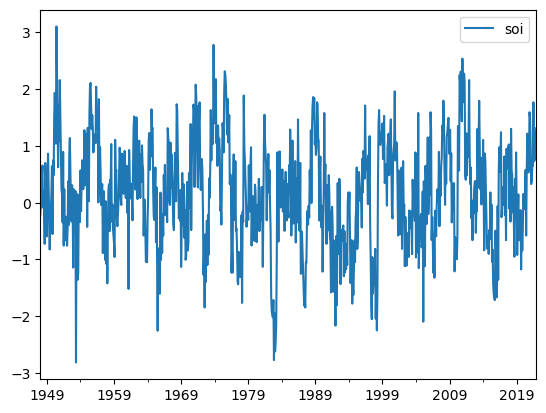

In [24]:
ts_soi.plot()

In [25]:
ts_soi.to_csv(opath)